# installation

- https://github.com/alexarchambault/jupyter-scala
- install R
- run this notebook
- https://dahl-git.byu.edu/dahl/rscala/

In [20]:
classpath.add(
  "org.ddahl" %% "rscala" % "1.0.13",
  "com.github.haifengl" % "smile-core" % "1.2.0",
  "org.apache.spark" %% "spark-mllib" % "2.0.0"
)

0 new artifact(s)


In [21]:
import org.apache.spark.mllib.linalg.Vectors
import org.apache.spark.mllib.regression.LabeledPoint


// Create a labeled point with a positive label and a dense feature vector.
val pos = LabeledPoint(1.0, Vectors.dense(1.0, 0.0, 3.0))

// Create a labeled point with a negative label and a sparse feature vector.
val neg = LabeledPoint(0.0, Vectors.sparse(3, Array(0, 2), Array(1.0, 3.0)))


import org.apache.spark.mllib.linalg.{Matrix, Matrices}

// Create a dense matrix ((1.0, 2.0), (3.0, 4.0), (5.0, 6.0))
val dm: Matrix = Matrices.dense(3, 2, Array(1.0, 3.0, 5.0, 2.0, 4.0, 6.0))

// Create a sparse matrix ((9.0, 0.0), (0.0, 8.0), (0.0, 6.0))
val sm: Matrix = Matrices.sparse(3, 2, Array(0, 1, 3), Array(0, 2, 1), Array(9, 6, 8))


// import org.apache.spark.mllib.tree.DecisionTree
// import org.apache.spark.mllib.tree.model.DecisionTreeModel
// import org.apache.spark.mllib.util.MLUtils

// // Train a DecisionTree model.
// //  Empty categoricalFeaturesInfo indicates all features are continuous.
// val numClasses = 2
// val categoricalFeaturesInfo = Map[Int, Int]()
// val impurity = "gini"
// val maxDepth = 5
// val maxBins = 32

// val model = DecisionTree.trainClassifier(pos, numClasses, categoricalFeaturesInfo, impurity, maxDepth, maxBins)

import org.apache.spark.mllib.linalg.Vectors
import org.apache.spark.mllib.regression.LabeledPoint
pos: LabeledPoint = (1.0,[1.0,0.0,3.0])
neg: LabeledPoint = (0.0,(3,[0,2],[1.0,3.0]))
import org.apache.spark.mllib.linalg.{Matrix, Matrices}
dm: Matrix = 1.0  2.0  
3.0  4.0  
5.0  6.0  
sm: Matrix = 3 x 2 CSCMatrix
(0,0) 9.0
(2,1) 6.0
(1,1) 8.0

In [22]:
val R = org.ddahl.rscala.RClient()

// val a = R.evalD0("rnorm(8)")
// val b = R.evalD1("rnorm(8)")
// val c = R.evalD2("matrix(rnorm(8),nrow=4)")

// // R eval "install.packages('ggplot2')"
// R eval """
//   v <- rbinom(8,size=10,prob=0.4)
//   m <- matrix(v,nrow=4)
// """
// val v1 = R.get("v")
// val v2 = R.get("v")._1.asInstanceOf[Array[Int]]   // This works, but is not very convenient
// val v3 = R.v._1.asInstanceOf[Array[Int]]          // Slightly better
// val v4 = R.getI0("v")   // Get the first element of R's "v" as a Int
// val v5 = R.getI1("v")   // Get R's "v" as an Array[Int]
// val v6 = R.getI2("m")   // Get R's "m" as an Array[Array[Int]]

// R.set("some_variable", v5)
// R eval """
//   library("ggplot2")
//   ggplot(some_variable) + geom_point()
// """


R: org.ddahl.rscala.RClient = org.ddahl.rscala.RClient@5c6236f

In [23]:
implicit class SeqAug[T](underlying: Seq[T]) {
  def toRVector: String = s"""c${underlying.toString.substring(4)}"""
}

def plot(x:List[Int], y:List[Double]) = {
  val fname = s"/tmp/${java.util.UUID.randomUUID.toString}"
  val orig = s"""plot(${x.toRVector}, ${y.toRVector})"""
  val ss = s"""
  png(filename="$fname")
  $orig
  dev.off()
  """
  R.eval(ss)
    
  object Display extends jupyter.api.Display
  val pathToFile = new java.io.File(fname)
  val image = javax.imageio.ImageIO.read(pathToFile)
  Display.png(image)
}

def bar(values: List[Int]) = {
  val fname = s"/tmp/${java.util.UUID.randomUUID.toString}"
  val orig = s"""barplot(${values.toRVector})"""
  val ss = s"""
  png(filename="$fname")
  $orig
  dev.off()
  """
  R.eval(ss)
    
  object Display extends jupyter.api.Display
  val pathToFile = new java.io.File(fname)
  val image = javax.imageio.ImageIO.read(pathToFile)
  Display.png(image)
}


defined class SeqAug
defined function plot
defined function bar

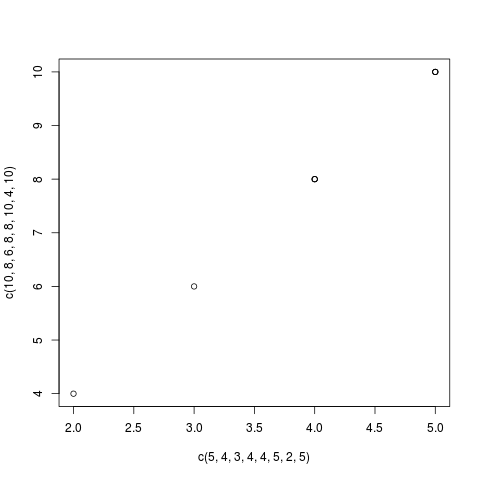

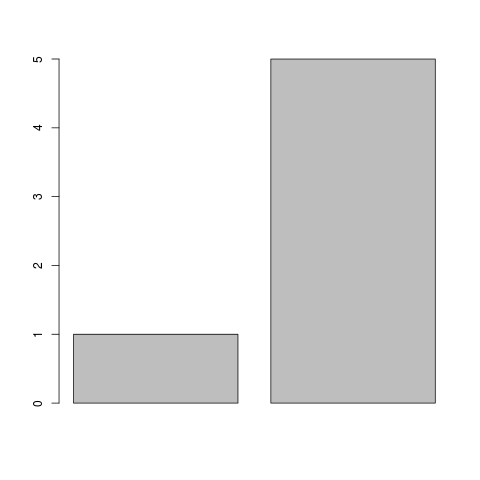

In [24]:
plot(v2.toList, v2.map(e => (e*2).toDouble).toList)

bar(List(1, 5))

In [25]:
scala.io.Source.fromFile("/home/temp/kaggle-bosch/data/train_numeric.csv").getLines.take(100).map {
    case line => println(line)
}

res24: Iterator[Unit] = non-empty iterator